<a href="https://colab.research.google.com/github/abdullahkhafabi-010/PCVK/blob/main/WEEK3/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Abdullah Khafabi

Nim: 2041720050

Kelas: 3A

# MODUL 3 – Operasi Citra Sederhana – Linier Brightness, Contrast, Inverse, Logarithmic Brightness, dan Grayscale Image

 import folder yang ada di Drive

In [1]:
from google.colab import drive

#Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


Transformasi Linier Brightness

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


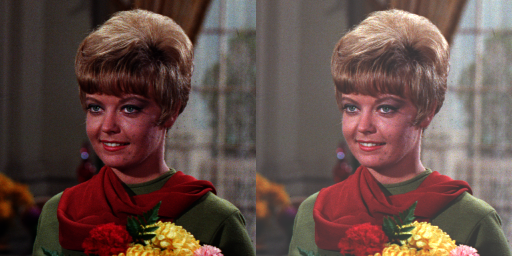

In [16]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow #for image display
from skimage import io
import matplotlib.pylab as plt

print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
      print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)


Tugas Praktikum

Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori

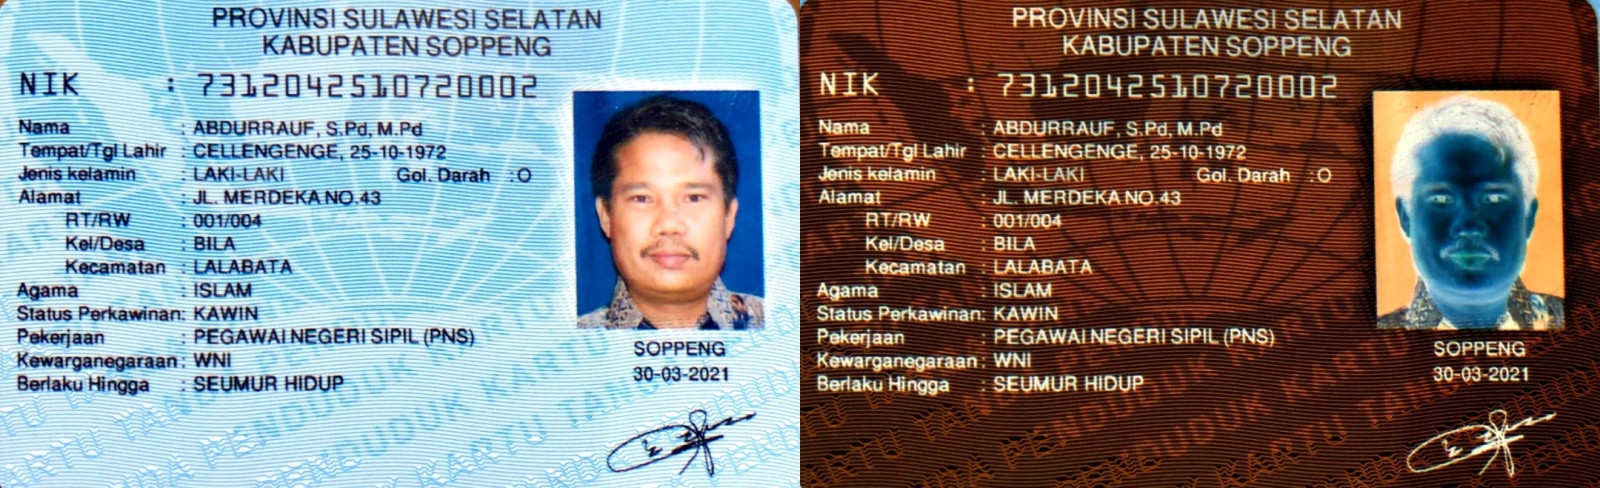

In [17]:
import cv2
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

base_image = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')
inversed_image = np.zeros(base_image.shape, base_image.dtype)

for y in range(base_image.shape[0]):
  for x in range(base_image.shape[1]):
    for c in range(base_image.shape[2]):
      inversed_image[y,x,c] = np.clip(255 - base_image[y,x,c], 0, 255)

final = cv.hconcat((base_image, inversed_image))
cv2_imshow(final)

Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras

Mengubah kontras dan tingkat kecerahan citra
---------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0] : 2


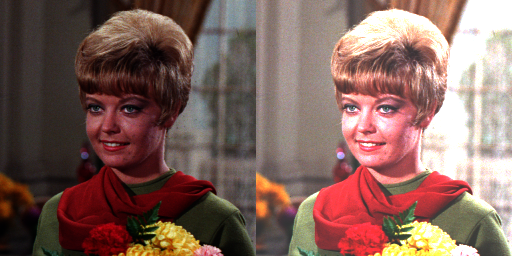

In [24]:
print('Mengubah kontras dan tingkat kecerahan citra')
print('---------------------------------------------')
original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
contrast_image = np.zeros(original.shape, original.dtype)

try:
    brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
    if brightness < -255 or brightness > 255:
        raise ValueError("Brightness value out of range")
except ValueError:
    print('Error, not a valid number or value out of range')
else:
    try:
        contrast = float(input('Masukkan kontras [1.0 - 3.0] : '))
        if contrast < 1.0 or contrast > 3.0:
            raise ValueError("Contrast value out of range")
    except ValueError:
        print('Error, not a valid number or value out of range')
    else:
        for y in range(original.shape[0]):
          for x in range(original.shape[1]):
            for c in range(original.shape[2]):
              contrast_image[y,x,c] = np.clip(contrast * original[y,x,c] + brightness,0,255)

        final_images = cv.hconcat((original, contrast_image))
        cv2_imshow(final_images)

Implementasikan transformasi logarithmic brightness pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi log

 Mengubah tingkat kecerahan citra dengan Transformasi Log 
-----------------------------------------------------------
Masukkan nilai kecerahan: 50


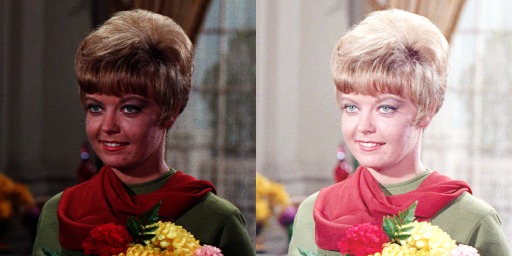

In [25]:
print(' Mengubah tingkat kecerahan citra dengan Transformasi Log ')
print('-----------------------------------------------------------')
try:
    const = int(input('Masukkan nilai kecerahan: '))
except ValueError:
      print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(const * (np.log(1 + original[y,x,c])), 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)


mplementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori

a. Averaging

a. Averaging


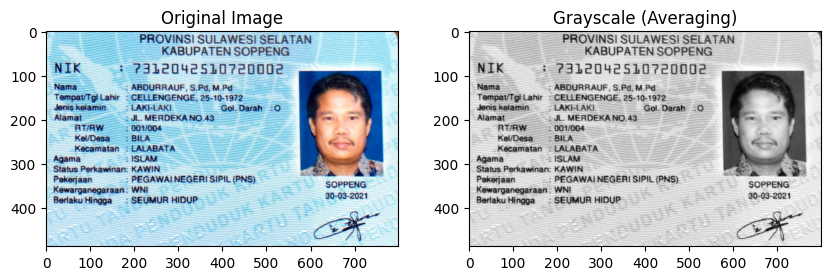

In [26]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

base_image = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')

# Implementasi Grayscale menggunakan metode Averaging
average_image = np.zeros(base_image.shape[:2], dtype=np.uint8)

for y in range(base_image.shape[0]):
    for x in range(base_image.shape[1]):
        red = int(base_image[y, x, 2])
        green = int(base_image[y, x, 1])
        blue = int(base_image[y, x, 0])
        avg = (red + green + blue) // 3
        average_image[y, x] = np.uint8(avg)

# Tampilkan gambar asli dan hasil transformasi grayscale
plt.figure(figsize=(10, 5))
print('a. Averaging')
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(average_image, cmap='gray')
plt.title('Grayscale (Averaging)')


plt.show()

b. Lightness

b. Lightness


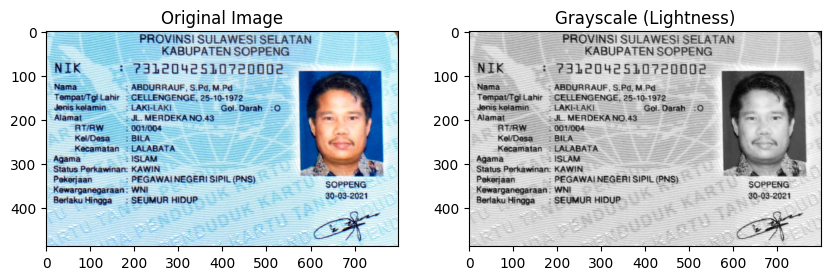

In [27]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Baca gambar sumber
base_image = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')

# Implementasi Grayscale menggunakan metode Lightness
lightness_image = np.zeros(base_image.shape[:2], dtype=np.uint8)

for y in range(base_image.shape[0]):
    for x in range(base_image.shape[1]):
        red = int(base_image[y, x, 2])
        green = int(base_image[y, x, 1])
        blue = int(base_image[y, x, 0])
        lightness = (max(red, green, blue) + min(red, green, blue)) // 2
        lightness_image[y, x] = np.uint8(lightness)

plt.figure(figsize=(10, 5))

print('b. Lightness')
# Plot Lightness Transformation
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
im = plt.imshow(lightness_image, cmap='gray')
plt.title('Grayscale (Lightness)')

plt.show()


c. Luminance

c. Luminance


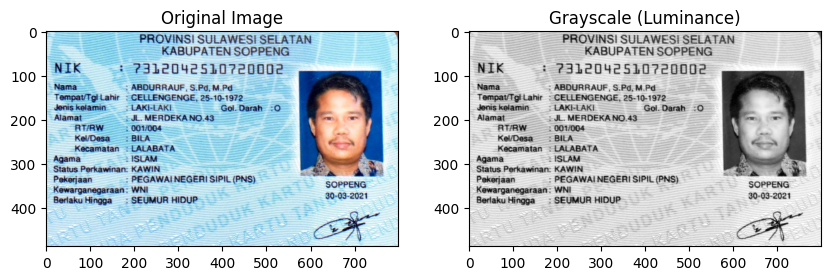

In [28]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Baca gambar sumber
base_image = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')

# Implementasi Grayscale menggunakan metode Luminance
luminance_image = np.zeros(base_image.shape[:2], dtype=np.uint8)

for y in range(base_image.shape[0]):
    for x in range(base_image.shape[1]):
        red = int(base_image[y, x, 2])
        green = int(base_image[y, x, 1])
        blue = int(base_image[y, x, 0])
        luminance = 0.21 * red + 0.72 * green + 0.07 * blue
        luminance_image[y, x] = np.uint8(luminance)

plt.figure(figsize=(10, 5))

# Plot Luminance Transformation
print('c. Luminance')
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(luminance_image, cmap='gray')
plt.title('Grayscale (Luminance)')

plt.show()

Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna biru menjadi grayscale

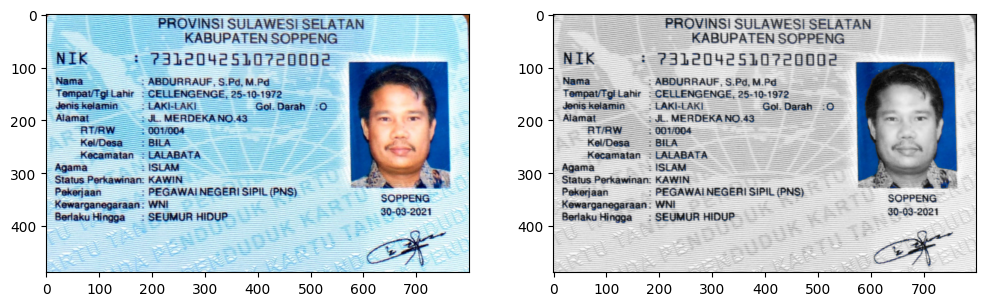

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

original = cv2.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')
result_image = np.copy(original)

lower_blue = np.array([100, 0, 0])    # Lower bound of blue color range (BGR format)
upper_blue = np.array([255, 100, 100])  # Upper bound of blue color range (BGR format)

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        is_blue = True

        for c in range(original.shape[2]):
            pixel_value = original[y, x, c]

            if lower_blue[c] <= pixel_value <= upper_blue[c]:
                pass
            else:
                is_blue = False
                break

        if not is_blue:
            grayscale_value = np.mean(original[y, x])
            result_image[y, x] = [grayscale_value, grayscale_value, grayscale_value]

plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))

plt.show()